In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['Computer Modern Serif']

### Problem 1

In [3]:
random_nums = np.random.uniform(size=100_000)


In [45]:
#np.savetxt('generated_nums.txt', random_nums)

Load the numbers saved in `generated_nums.txt`

In [4]:
saved_nums = np.loadtxt('generated_nums.txt')

In [5]:
def compute_average(nums: np.ndarray):
    """
    Takes an np.ndarray object and calculates the average of the entries in that array

    Note: indicating the variable type to np.ndarray in the function arguments does not
    put a requirement, but rather only serves as guidance (shows up in generated docs)

    """
    return nums.sum()/len(nums)


def compute_variance(nums: np.ndarray):
    """
    Computes sigma^2
    """
    avg_of_squares = (nums**2).sum()/len(nums)
    square_of_avg = (compute_average(nums)**2)/len(nums)

    return avg_of_squares-square_of_avg


def compute_err_mean(nums):
    err = np.sqrt(compute_variance(nums)/len(nums))
    return err


In [6]:
print('The mean of the random numbers is', compute_average(saved_nums))
print('Variance:', compute_variance(saved_nums))
print('Error of the mean value', compute_err_mean(saved_nums))

The mean of the random numbers is 0.5008157876845698
Variance: 0.3341817531362801
Error of the mean value 0.0018280638750773457


In [7]:
freqs, bin_edges = np.histogram(saved_nums, bins=100)

Text(0.5, 1.0, 'Frequency distribution of the generated numbers')

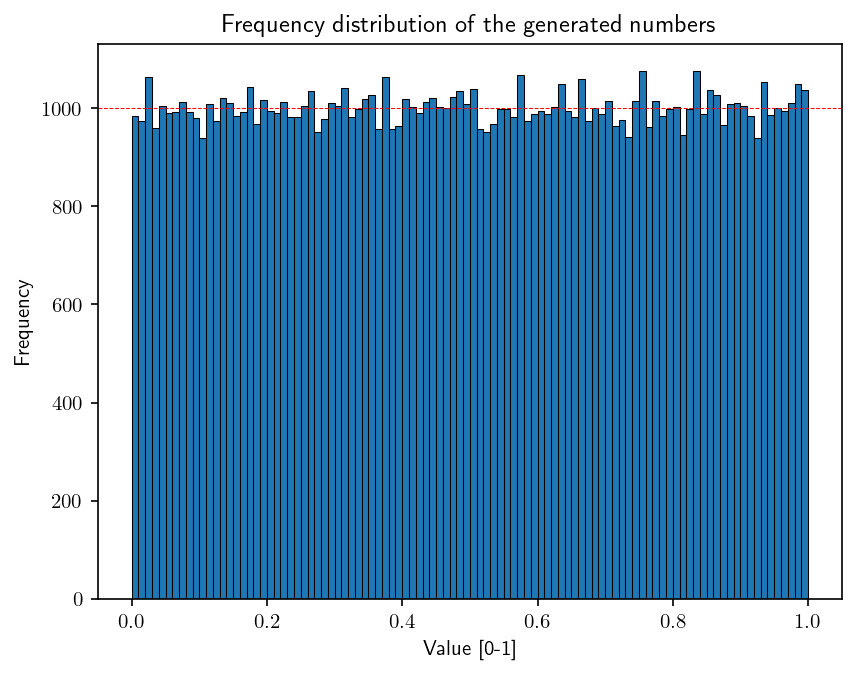

In [8]:
plt.hist(x=[(bin_edges[i] + bin_edges[i-1])/2 for i in range(1, len(bin_edges))],
                 bins=bin_edges, weights=freqs, ec='k', lw=0.5)
plt.axhline(y=1000, xmin=0, xmax=1, ls='--', lw=0.5, c='r')
plt.xlabel('Value [0-1]')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the generated numbers')

In [10]:
x_rands, y_rands = np.random.uniform(size=(2,100_000))

In [17]:
def get_bin_centres(bin_edges):
    return [(bin_edges[i] + bin_edges[i-1])/2 for i in range(1, len(bin_edges))]

Text(0.5, 0.98, 'Frequency distribution of each (x,y) pair')

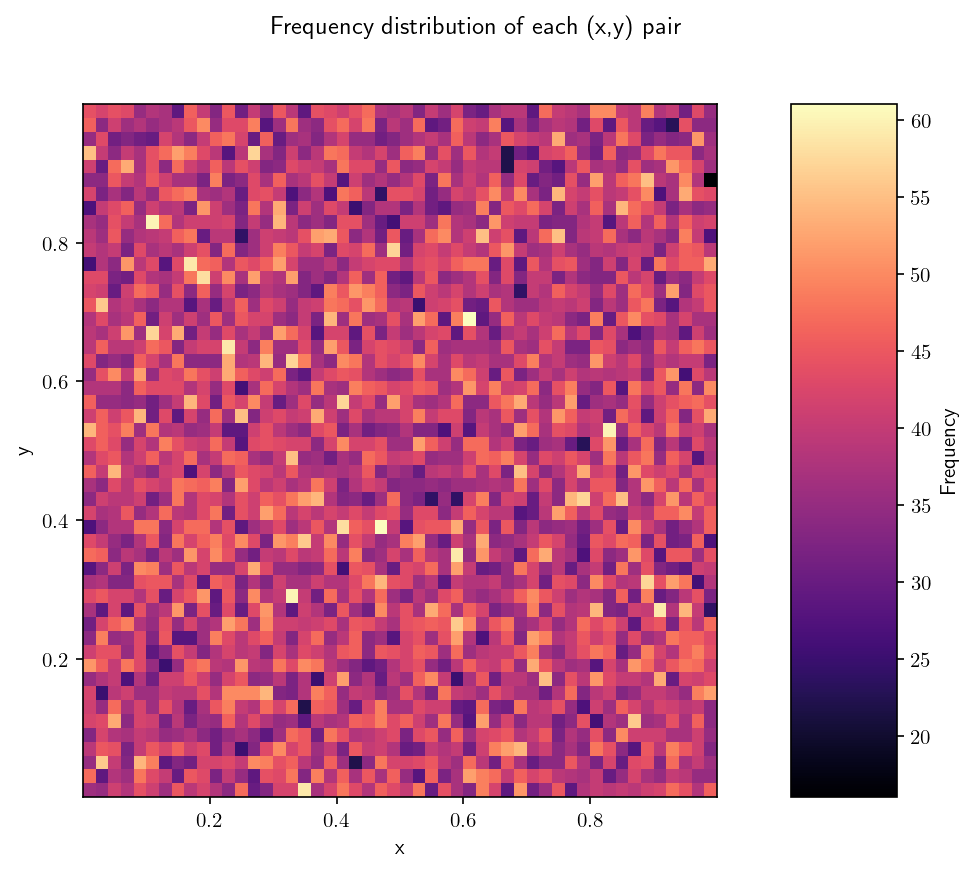

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(7,6), width_ratios=[6,1])
hist_2d = axes[0].hist2d(x_rands, y_rands, bins=50, cmap='magma')
cbar = plt.colorbar(hist_2d[3], cax=axes[1], label='Frequency')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
plt.suptitle('Frequency distribution of each (x,y) pair')

In [202]:
class LinearCongruentialNumGen():
    """
    A class for creating an instance of our own generator
    """

    a = 1664525 # suggested parameters
    c = 1013904223
    modulus = 2**32

    global last_gen
    last_gen = None


    def __init__(self, seed=0.5):
        self.seed = seed
        global last_gen
        if last_gen == None:
            last_gen = seed


    def hard_reset(self):
        last_gen = self.seed


    def next_num(self) -> float:
        """
        This is the function that generates each x_{n+1}
        """
        global last_gen
        last_gen = ((self.a*last_gen + self.c) % self.modulus)
        return last_gen/self.modulus


    def random(self, N: int) -> np.ndarray:
        """
        Generate N (pseudo)random numbers and return them as an np.ndarray
        """
        return np.array([self.next_num() for i in range(N)])

Create an instance of the generator

In [203]:
my_gen = LinearCongruentialNumGen(seed=0.4)

Testing

In [204]:
my_gen.random(10)

array([0.23622299, 0.31484841, 0.29341707, 0.28267344, 0.25066387,
       0.52089183, 0.71614074, 0.40649679, 0.31126416, 0.20477694])

Looks like it worked

### Problem 2

In [213]:
def approx_pi(grid_length = 100000):
    radius = 1
    x, y = np.random.uniform(size=(2, grid_length))

    inside = sum(np.sqrt(x**2 + y**2) <= radius)
    frac_inside = inside/grid_length

    pi = frac_inside*4
    return pi

In [217]:
pi_est = approx_pi(1_000_000)

In [221]:
# accuracy
true_val = 3.1415926535897932384626433830795 # written down from memory, I can write more ;)
print('Accuracy:', (1-abs(pi_est-true_val))*100, '%')

Accuracy: 99.93153464102069 %


This is after drawing a sample of 1 million numbers? My memory can do so much better ;)

### Problem 3

#### Part (a)
The metropolis algorithm enforces detailed balance. This can be seen as follows:

__Proof__: In the canonical ensemble, probability of existing in state $i$ is given by the Boltzmann factor $e^{-\beta E_i}$.

Consider states $i$ and $j$, such that $\omega_{ij} = P_j/P_i < 1$. This means $e^{-\beta(E_j-E_i)} > 0$, or simply $\Delta E > 0$.

According to the metropolis criterion, $$\omega_{ji} = min\left(1, \frac{P_i}{P_j} = e^{\beta\Delta E}\right)$$
and since for $\Delta E > 0$, this in turn gives $\omega_{ji} = 1$.

Then, we get, $$ \frac{\omega_{ij}}{\omega_{ji}} = \frac{P_j/P_i}{1}$$
which in turn implies
$\implies P_i \omega_{ij} = P_j \omega_{ji}$, which is essentially detailed balance.

Showing that this holds even when $P_j/P_i > 1,\ \Delta E < 0$ is trivial. Since $i$ and $j$ are independent indices that run over the same range, swapping the indices has no effect. Therefore, it holds also for the converse case.

#### Part (b): Heat bath algorithm
If the transition probability is given as $$\omega_{ij} = \frac{e^{-\beta \Delta E}}{e^{-\beta\Delta E} + 1} $$ where $\Delta E = E_j - E_i$. Then the probability for the other transition $$ \omega_{ji} = \frac{e^{\beta\Delta E}}{e^{\beta\Delta E} + 1} $$

The ratio of the transition probabilities, then $$ \frac{\omega_{ij}}{\omega_{ji}} = \frac{e^{-\beta\Delta E} (e^{\beta\Delta E} + 1 )}{(e^{-\beta \Delta E} + 1)e^{\beta\Delta E}} = \frac{1 + e^{-\beta\Delta E}}{1 + e^{\beta\Delta E}}$$

Given the Boltzmann probability of state $i$ occuring, the ratio $$ \frac{P_j}{P_i} = e^{-\beta\Delta E}$$ holds due to the nature of the ensemble (canonical).

Then, substituting this in the expression above

$$\frac{\omega_{ij}}{\omega_{ji}} = \frac{1 + P_j/P_i}{1 + P_i/P_j} = \frac{(P_i + P_j)/P_i}{(P_j + P_i)/P_j}  $$

$$ \implies \boxed{\frac{\omega_{ij}}{\omega_{ji}} = \frac{P_j}{P_i} = e^{-\beta\Delta E}}$$

which is the desired result. Therefore, the heat bath algorithm also ensures detailed balance for the canonical ensemble.

#### Part (c)

$\rightarrow$ I'm sorry, but.. what does the question mean, exactly? How many particles do we assume? What's the dimensions of the 2D box we are considering? I only understand the interaction range is $\sim \sigma$

Let's consider a system of two "hard" discs in a plane of finite dimensions $a\times a$. There are two possible macrostates, with $E = 0$ and $E=\infty$. Let's call the former state $i$ and latter state $j$.

The Boltzmann probability $P_i = e^{-\beta\Delta E_i} = e^{0} = 1$ and

 $P_j = e^{-\beta\Delta E_j} = e^{-\infty} = 0$

 __Metropolis__
 Since $P_i/P_j \to \infty$, the transition $j\to i$ should have the probability $\text{min}(1, \infty) = 1$.
 Conversely, $P_j/P_i = 0$, and so $\omega_{ij} = 0$.

 This satisfies detailed balance trivially, $P_j \omega_{ji} = P_i \omega_{ij} = 0$

 __Heat Bath__
 Note that since in this algorithm $$\omega_{ij} = \frac{e^{-\beta\Delta E}}{e^{-\beta\Delta E} + 1}$$
 Each of the $\omega$'s are typically bounded from above due to the nature of the expression (at max equal to 1). The two probabilities are still in the $\Delta E \to 0$ and asymptotic $\Delta E \to \infty$ limits

 $$\omega_{ji} = \frac{e^{\beta\Delta E}}{1 + e^{\beta \Delta E}} = \lim_{\Delta E \to \infty}\left(1 - \frac{1}{e^{\beta\Delta E} + 1}\right) \simeq 1$$
 and $\omega_{ij} = 0$. Once again, detailed balance is satisfied trivially $P_j \omega_{ji} = P_i \omega_{ij} = 0$.

 The hard disks problem is thus one case in which the $\omega$'s given by either algorithms are identical

### Problem 4

#### Part (a)
At low temperatures, the system retains its configuration. In the presence of a field $H$, all spins will remain aligned or anti-aligned. In absence of any field, the system keeps its magnetisation.

As the temperature is raised, spontaneous flipping of certain spins occurs.

As the temperature is continually raised, a phase transition occurs from a state of aligned spins to completely random spins. The transition occurs smoothly between $1.5 < T < 3.5$ and peaks _roughly_ around 2.4(?). This is a second-order phase transition.

The Wolff algorithm is suited for higher temperatures. At lower temperatures, the size of the clusters is too large and thus the algorithm sometimes flips the entire grid. In those cases, Metropolis would provide a more physical update.

However, Metropolis is slower at higher temperatures, since every single particle in the grid is updated individually.

#### Part (b)

Algorithm for single spin-flip
* Choose a random spin to flip
* Draw a random $r \in (0, 1)$
* _iff_ $r \leq e^{-\beta \Delta E}$, flip the spin of this particle.
    * if $\Delta E < 0$, then $e^{-\beta \Delta E} > 1$ and this is always satisfied. So, for negative $\Delta E$, accept the flip move trivially.